In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.drop('id', axis=1, inplace=True)

<Axes: xlabel='diagnosed_diabetes', ylabel='count'>

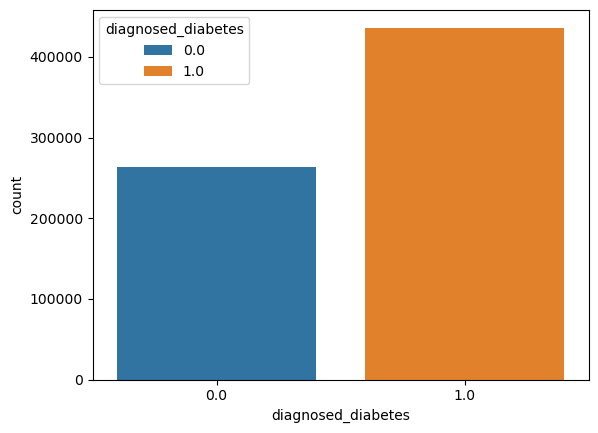

In [14]:
sns.countplot(data=df, x='diagnosed_diabetes', hue='diagnosed_diabetes')

In [22]:
df_numerical = df.select_dtypes(exclude='object')

In [26]:
X, y = df_numerical.drop('diagnosed_diabetes', axis=1), df['diagnosed_diabetes']

In [27]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
cross_val_score(lgbm, X, y, cv=5)

[LightGBM] [Info] Number of positive: 349045, number of negative: 210955
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1616
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623295 -> initscore=0.503556
[LightGBM] [Info] Start training from score 0.503556
[LightGBM] [Info] Number of positive: 349045, number of negative: 210955
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 18
[LightGBM] [In

array([0.6824    , 0.68099286, 0.68257857, 0.68219286, 0.67733571])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, stratify=y)

In [29]:
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 87261, number of negative: 52739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623293 -> initscore=0.503548
[LightGBM] [Info] Start training from score 0.503548


LGBMClassifier()

In [30]:
y_pred = lgbm.predict(X_test)

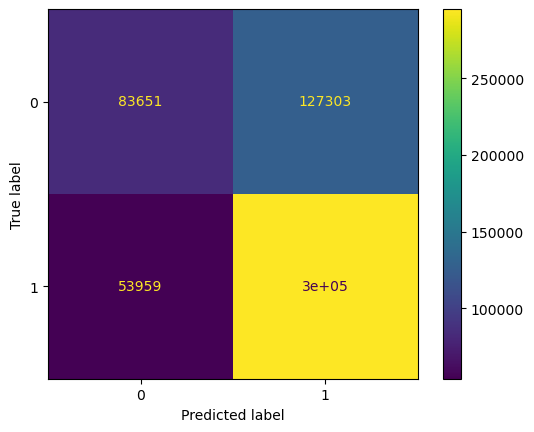

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [40]:
y.value_counts()[1] / y.value_counts().sum()

0.6232957142857143

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.40      0.48    210954
         1.0       0.70      0.85      0.77    349046

    accuracy                           0.68    560000
   macro avg       0.65      0.62      0.62    560000
weighted avg       0.66      0.68      0.66    560000



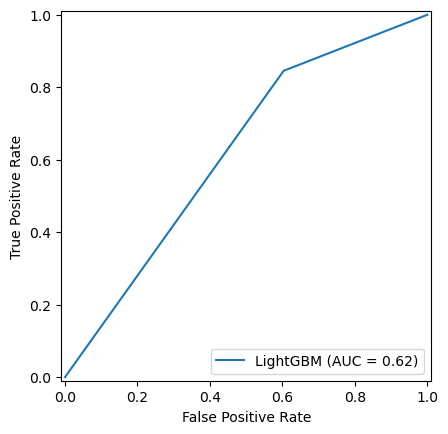

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LightGBM')
display.plot()

In [43]:
df_test = pd.read_csv('test.csv')

In [47]:
df_test = df_test.select_dtypes(exclude='object')
ids = df_test['id']
df_test.drop('id', axis=1, inplace=True)

In [50]:
lgbm = LGBMClassifier()
lgbm.fit(X, y)

[LightGBM] [Info] Number of positive: 436307, number of negative: 263693
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503561
[LightGBM] [Info] Start training from score 0.503561


LGBMClassifier()

In [62]:
result = pd.concat(
    [ids, pd.Series(lgbm.predict(df_test).astype(int), name='diagnosed_diabetes')], axis=1
).set_index('id')

In [65]:
result.to_csv('submission.csv')